In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

# Create a small dataset
data = {
    "Age": [25, 30, 35, 40, 45, 50, 55, 60],
    "Salary": [40000, 50000, 60000, 80000, 110000, 150000, 200000, 300000],
    "Purchased": [0, 0, 1, 0, 1, 1, 1, 1]  # 0 = No, 1 = Yes
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Save the dataset to an Excel file
file_path = "/content/drive/MyDrive/small_dataset.xlsx"
df.to_excel(file_path, index=False)

print(f"Excel file created: {file_path}")


Excel file created: /content/drive/MyDrive/small_dataset.xlsx


Accuracy: 0.33

Decision Tree Rules:

|--- Age <= 42.50
|   |--- Salary <= 70000.00
|   |   |--- class: 1
|   |--- Salary >  70000.00
|   |   |--- class: 0
|--- Age >  42.50
|   |--- class: 1



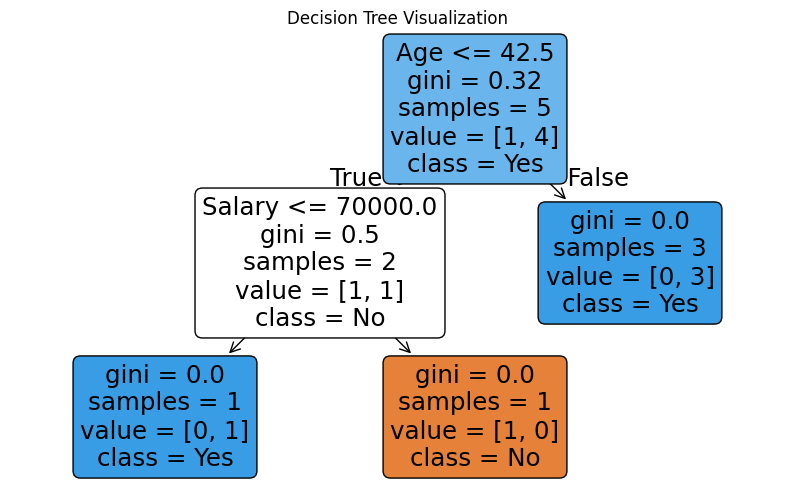

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
file_path = "/content/drive/MyDrive/small_dataset.xlsx"
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    raise

# Check for missing values
if df.isnull().sum().any():
    print("Warning: Missing values detected in the dataset. Please handle them before proceeding.")
    df = df.dropna()  # Drop rows with missing values (optional)

# Features (X) and label (y)
X = df[["Age", "Salary"]]
y = df["Purchased"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree rules
tree_rules = export_text(decision_tree, feature_names=["Age", "Salary"])
print("\nDecision Tree Rules:\n")
print(tree_rules)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(
    decision_tree,
    feature_names=["Age", "Salary"],
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


Dataset Preview:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Accuracy: 1.00

Decision Tree Rules:

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |  

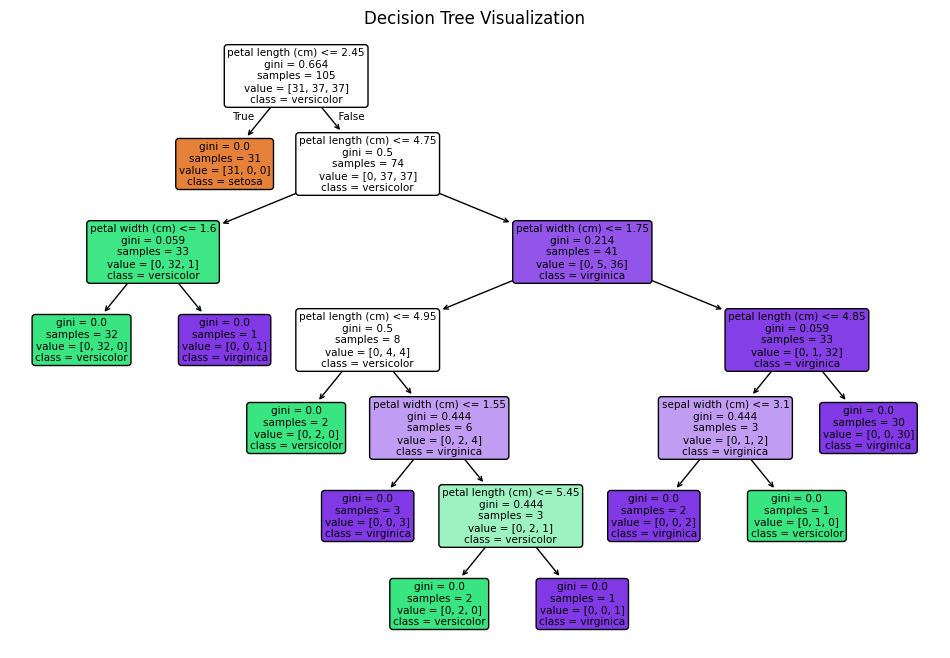

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load a small dataset (Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Convert the dataset into a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

# Display the first few rows of the DataFrame
print("Dataset Preview:\n", df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Visualize the decision tree rules
tree_rules = export_text(decision_tree, feature_names=data.feature_names)
print("\nDecision Tree Rules:\n")
print(tree_rules)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    decision_tree,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


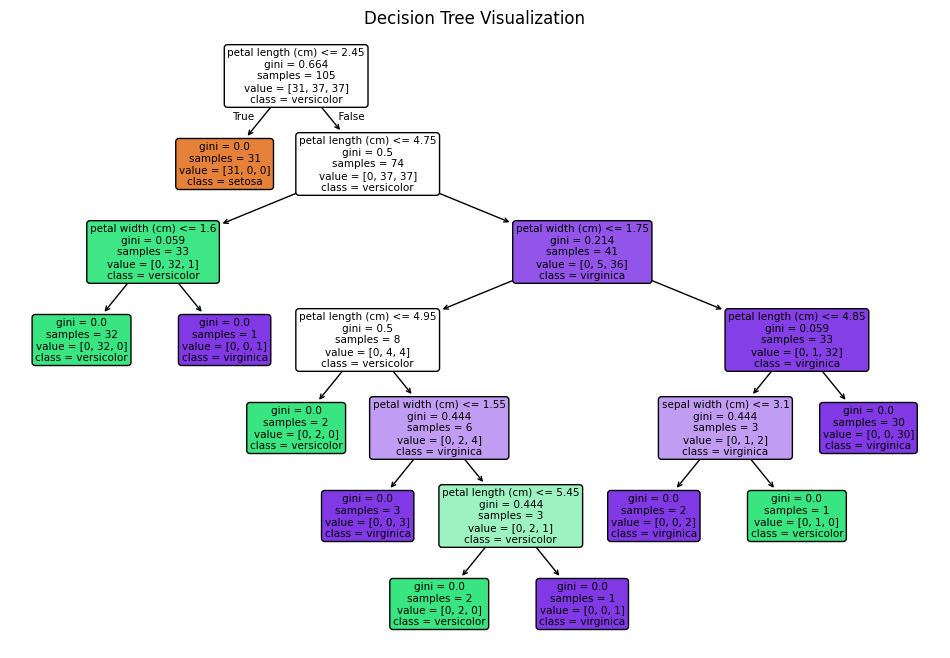

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ensure the decision tree is trained
if 'decision_tree' in globals():
    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(
        decision_tree,
        feature_names=data.feature_names,
        class_names=data.target_names,
        filled=True,
        rounded=True
    )
    plt.title("Decision Tree Visualization")
    plt.show()
else:
    print("Error: 'decision_tree' is not defined. Train the model before plotting.")


<ipython-input-11-4a6b08dbfd4f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


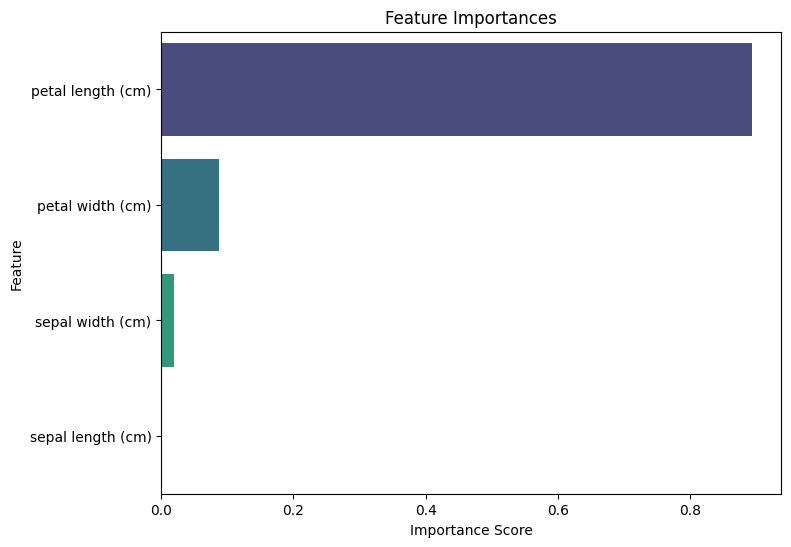

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the decision tree is trained
if 'decision_tree' in globals():
    # Get feature importances
    feature_importances = pd.DataFrame({
        'Feature': data.feature_names,
        'Importance': decision_tree.feature_importances_
    })

    # Sort the feature importances in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()
else:
    print("Error: 'decision_tree' is not defined. Train the model before plotting feature importances.")


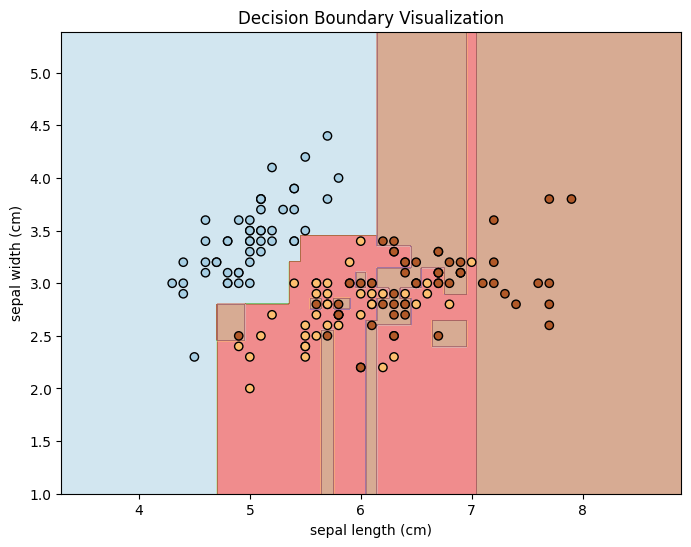

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization (first two features)
X_simple = X[:, :2]  # Only use the first two features
decision_tree.fit(X_simple, y)

# Create a grid to plot
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for the grid points
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary Visualization")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[17  0]
 [ 0 13]]


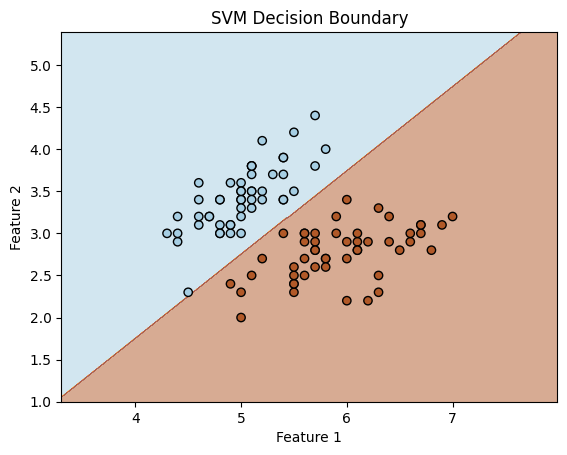

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset (use two features for 2D visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using first two features for simplicity
y = iris.target

# Use only two classes for binary classification (class 0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Evaluate the SVM
y_pred = svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the SVM decision boundary
plot_decision_boundary(X, y, svm, "SVM Decision Boundary")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[17  0]
 [ 0 13]]


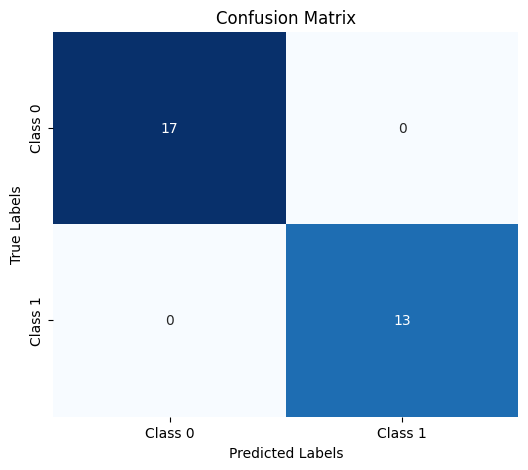

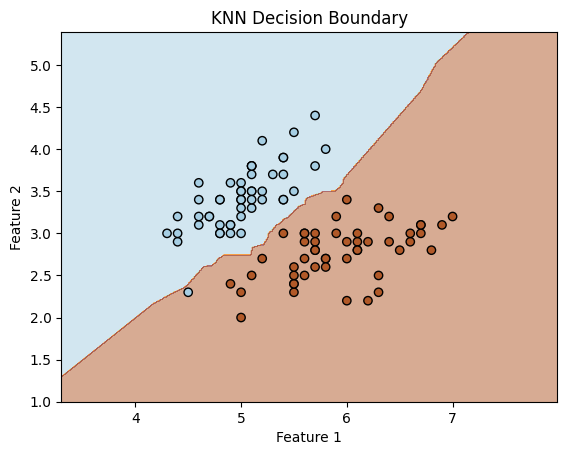

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the Iris dataset (use two features for 2D visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using first two features for simplicity
y = iris.target

# Use only two classes for binary classification (class 0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

# Evaluate the KNN model
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Adding labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the KNN decision boundary
plot_decision_boundary(X, y, knn, "KNN Decision Boundary")


Accuracy: 70.13%


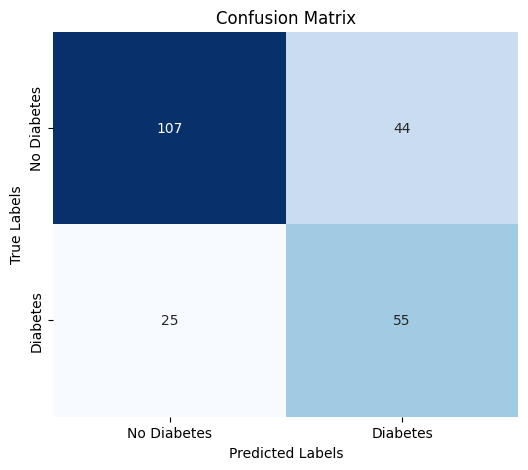

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



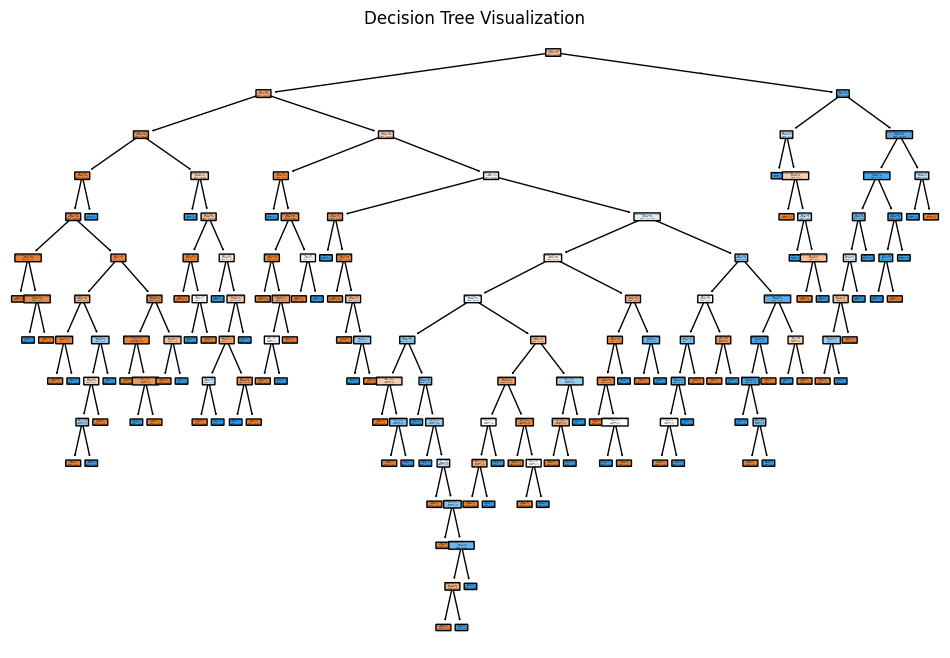

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)  # Features (independent variables)
y = data['Outcome']  # Target (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# (Optional) Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
